Dataset Shape: (4028, 26)
Dataset Columns: Index(['title', 'release_year', 'rating', 'genres', 'description',
       'poster_url', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western', '[]'],
      dtype='object')
Basic Statistics:
            rating
count  4028.000000
mean      0.647435
std       0.140812
min       0.000000
25%       0.610000
50%       0.670000
75%       0.728650
max       1.000000


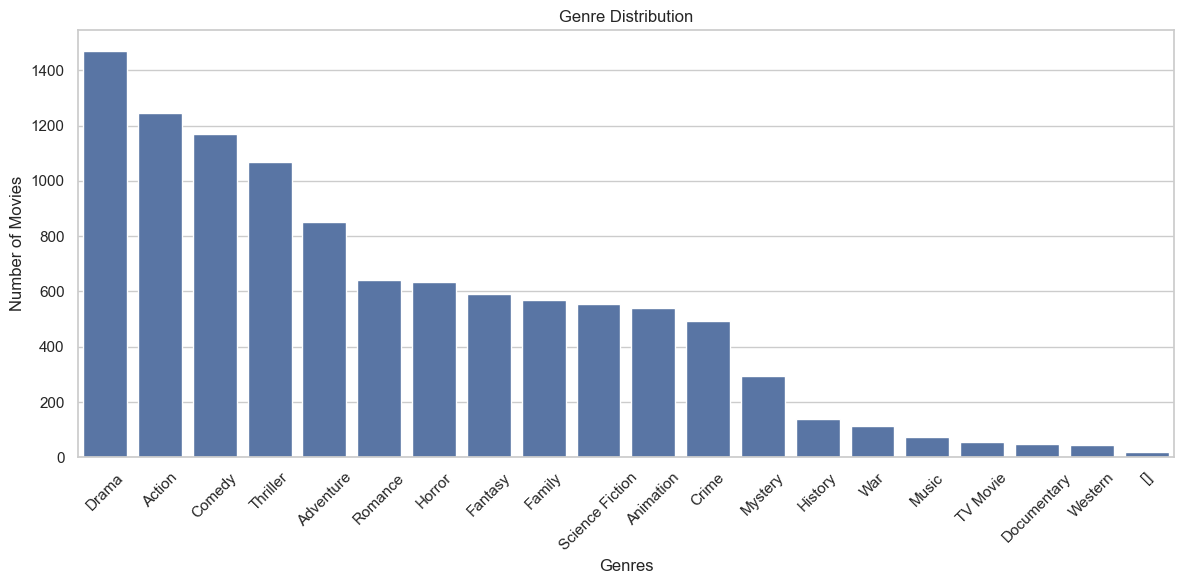

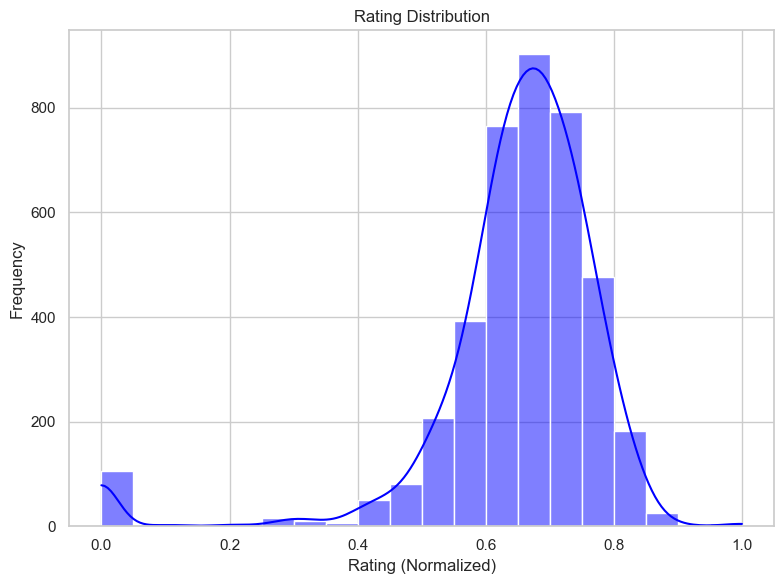

C:\Users\arsen\AppData\Local\Temp\ipykernel_15112\2929043177.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg_rating.index, y=genre_avg_rating.values, palette="viridis")


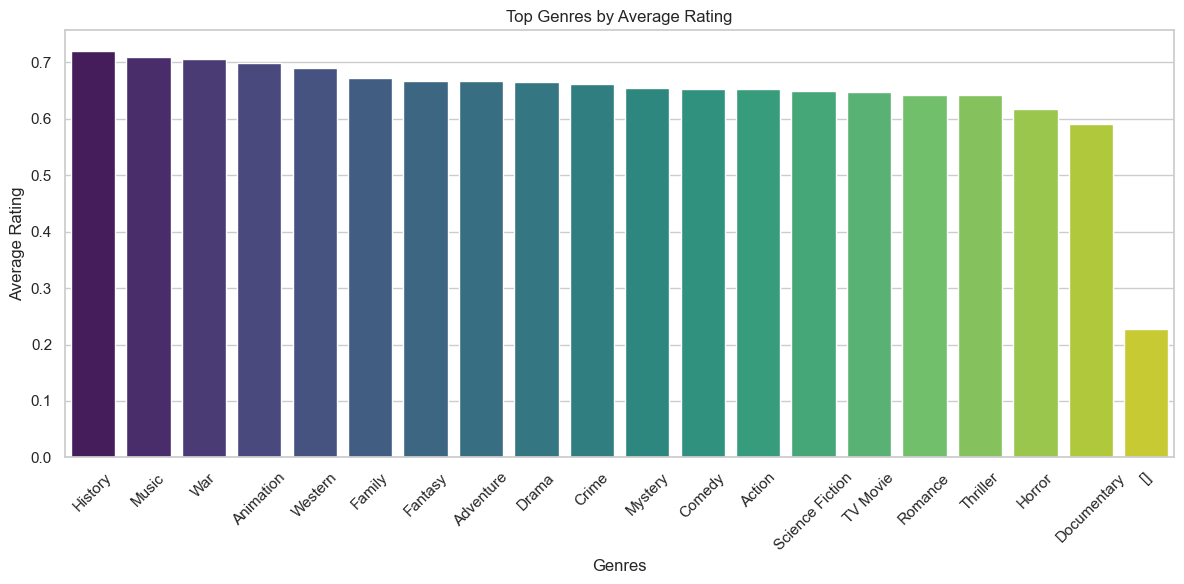

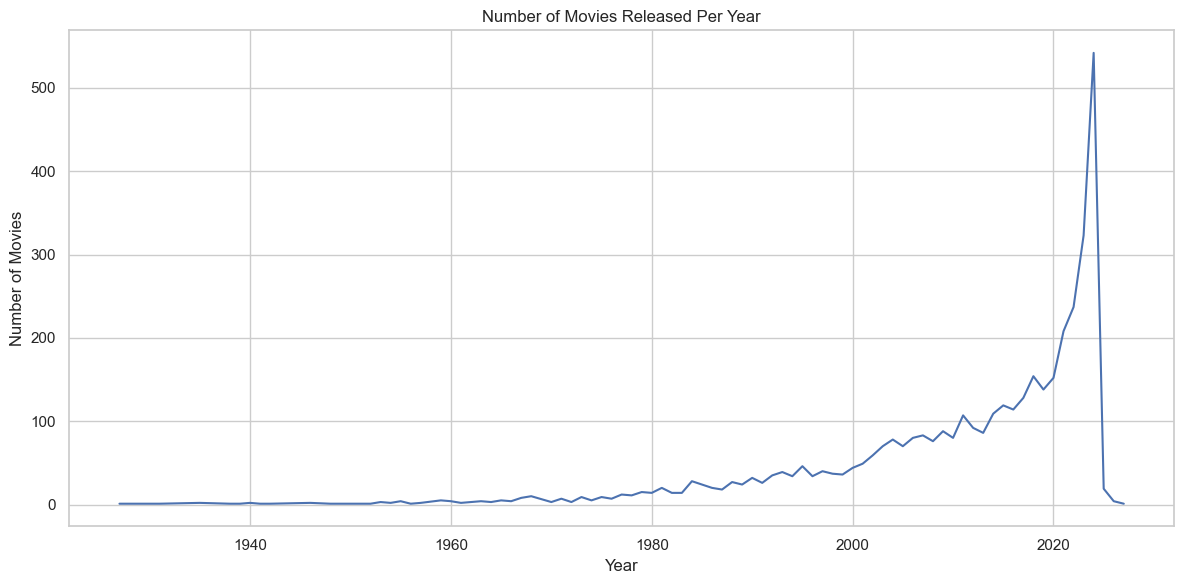


--- Insights ---
Total Movies: 4028
Most Common Genre: Drama (1471 movies)
Highest Average Rating Genre: History (0.72 rating)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
data = pd.read_csv('movies_data_cleaned.csv')

# Set seaborn style for plots
sns.set(style="whitegrid")

# 1. Basic Exploration
print("Dataset Shape:", data.shape)
print("Dataset Columns:", data.columns)
print("Basic Statistics:")
print(data[['rating']].describe())

# 2. Genre Distribution
genre_columns = data.columns[6:]  # Genres start from the 6th column onward
genre_counts = data[genre_columns].sum().sort_values(ascending=False)

# Plot Genre Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title("Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Rating Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['rating'], kde=True, bins=20, color='blue')
plt.title("Rating Distribution")
plt.xlabel("Rating (Normalized)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 4. Top Genres by Average Rating
genre_avg_rating = {}
for genre in genre_columns:
    avg_rating = data.loc[data[genre] == 1, 'rating'].mean()
    genre_avg_rating[genre] = avg_rating

genre_avg_rating = pd.Series(genre_avg_rating).sort_values(ascending=False)

# Plot Top Genres by Rating
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_avg_rating.index, y=genre_avg_rating.values, palette="viridis")
plt.title("Top Genres by Average Rating")
plt.xlabel("Genres")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Yearly Trends
# Convert release_year to integer if it's not
data['release_year'] = data['release_year'].astype(int)
yearly_counts = data.groupby('release_year').size()

# Plot Yearly Trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title("Number of Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

# 6. Insights Summary
print("\n--- Insights ---")
print(f"Total Movies: {data.shape[0]}")
print(f"Most Common Genre: {genre_counts.idxmax()} ({genre_counts.max()} movies)")
print(f"Highest Average Rating Genre: {genre_avg_rating.idxmax()} ({genre_avg_rating.max():.2f} rating)")
